Working with normal text for RNN

In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

Step 1: Tokenize text

In [2]:
docs = ['go india',
        'india india',
        'hip hip hurray',
        'jeetega bhai jeetega india jeetega',
        'bharat mata ki jai',
        'kohli kohli',
        'sachin sachin',
        'dhoni dhoni',
        'modi ji ki jai',
        'inquilab zindabad']

In [3]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(docs)

In [4]:
print("Word Index:", tokenizer.word_index)
print("Number of unique words:", len(tokenizer.word_index))

Word Index: {'india': 1, 'jeetega': 2, 'hip': 3, 'ki': 4, 'jai': 5, 'kohli': 6, 'sachin': 7, 'dhoni': 8, 'go': 9, 'hurray': 10, 'bhai': 11, 'bharat': 12, 'mata': 13, 'modi': 14, 'ji': 15, 'inquilab': 16, 'zindabad': 17}
Number of unique words: 17


In [5]:
# Convert text to sequences
sequences = tokenizer.texts_to_sequences(docs)

In [6]:
# Pad sequences to the same length
sequences = pad_sequences(sequences, padding='post')
print("Padded Sequences:\n", sequences)

Padded Sequences:
 [[ 9  1  0  0  0]
 [ 1  1  0  0  0]
 [ 3  3 10  0  0]
 [ 2 11  2  1  2]
 [12 13  4  5  0]
 [ 6  6  0  0  0]
 [ 7  7  0  0  0]
 [ 8  8  0  0  0]
 [14 15  4  5  0]
 [16 17  0  0  0]]


Step 2: Define model

In [7]:
vocab_size = 18  # For your docs example
embedding_dim = 2
input_length = 5  # length of padded sequences

In [8]:

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Build the model to initialize weights
model.build(input_shape=(None, input_length))
model.summary()

c:\Users\cheta\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 5, 2)           │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 32)             │         1,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,189 (4.64 KB)

 Trainable params: 1,189 (4.64 KB)

 Non-trainable params: 0 (0.00 B)

Step 3: Predict embeddings

In [9]:
pred = model.predict(sequences)
print("Embeddings Shape:", pred.shape)
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
Embeddings Shape: (10, 1)
[[0.4987289 ]
 [0.49875447]
 [0.50885427]
 [0.4954506 ]
 [0.5060127 ]
 [0.4956989 ]
 [0.48677516]
 [0.487863  ]
 [0.4910663 ]
 [0.48548102]]


# IMDB Dataset

Step 1: Import libraries

In [10]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

Step 2: Load & preprocess IMDB data

In [11]:
num_words = 10000  # Top 10,000 frequent words
maxlen = 50        # Max sequence length

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (25000, 50)
X_test shape: (25000, 50)


Step 3: Build the model

In [12]:
model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=50, input_length=maxlen))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Build the model for IMDB input size
model.build(input_shape=(None, maxlen))
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 50, 50)         │       500,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 32)             │         2,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 502,689 (1.92 MB)

 Trainable params: 502,689 (1.92 MB)

 Non-trainable params: 0 (0.00 B)

Step 4: Train the model

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=64,
    validation_data=(X_test, y_test)
)

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7314 - loss: 0.5208 - val_accuracy: 0.8087 - val_loss: 0.4283
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8635 - loss: 0.3250 - val_accuracy: 0.8067 - val_loss: 0.4310
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9364 - loss: 0.1761 - val_accuracy: 0.7607 - val_loss: 0.5698
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9793 - loss: 0.0679 - val_accuracy: 0.7714 - val_loss: 0.6768
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9944 - loss: 0.0260 - val_accuracy: 0.7739 - val_loss: 0.7906


Step 5: Plot accuracy and loss

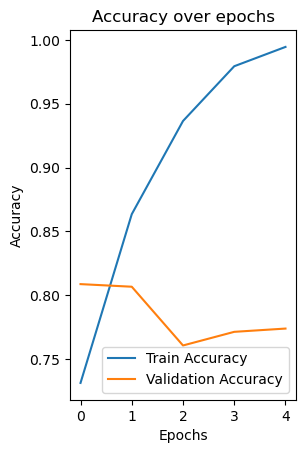

In [14]:
# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

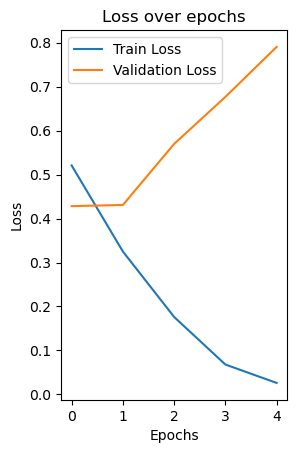

In [15]:
# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()